# Main Imports

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import re
import os

# import data
file_cell_based_5x = os.path.join("..", "clean-files",  "UL", "throughput", "Cell-based-5ues.txt")
file_cell_free_5x = os.path.join("..", "clean-files", "UL", "throughput", "Cell-free-5ues.txt")


## Calculations for 5X Scenarios

In [6]:

# Read content of the file
with open(file_cell_based_5x, "r") as f:
    linhas_cb = [linha.strip() for linha in f if linha.strip()]

# Regex to extract throughput values, through dictionary
dados_ues_cb = defaultdict(list)

for linha in linhas_cb:
    match = re.match(r"\[UE (\d+) \| RB \d+\] Throughput = ([\d\.]+)", linha)
    if match:
        ue = int(match.group(1))
        throughput = float(match.group(2))
        dados_ues_cb[ue].append(throughput)

# Create DataFrames for each UE 
dfs_cb = {}
for ue, valores in dados_ues_cb.items():
    tempo = [i * 10 for i in range(len(valores))] 
    df_ind_cb = pd.DataFrame({
        "Time (ms)": tempo,
        "Throughput (Mbps)": valores
    })
    df_ind_cb["Rolling Avg (Mbps)"] = df_ind_cb["Throughput (Mbps)"].rolling(window=5).mean()
    dfs_cb[ue] = df_ind_cb



# Read content of the file
with open(file_cell_free_5x, "r") as f:
    linhas_cf = [linha.strip() for linha in f if linha.strip()]

# Regex to extract throughput values, through dictionary
dados_ues_cf = defaultdict(list)

for linha in linhas_cf:
    match = re.match(r"\[UE (\d+) \| RB \d+\] Throughput = ([\d\.]+)", linha)
    if match:
        ue = int(match.group(1))
        throughput = float(match.group(2))
        dados_ues_cf[ue].append(throughput)

# Create DataFrames for each UE 
dfs_cf = {}
for ue, valores in dados_ues_cf.items():
    tempo = [i * 10 for i in range(len(valores))] 
    df_ind_cf = pd.DataFrame({
        "Time (ms)": tempo,
        "Throughput (Mbps)": valores
    })
    df_ind_cf["Rolling Avg (Mbps)"] = df_ind_cf["Throughput (Mbps)"].rolling(window=5).mean()
    dfs_cf[ue] = df_ind_cf


## Cell-Based 5x UE Throughput x Time

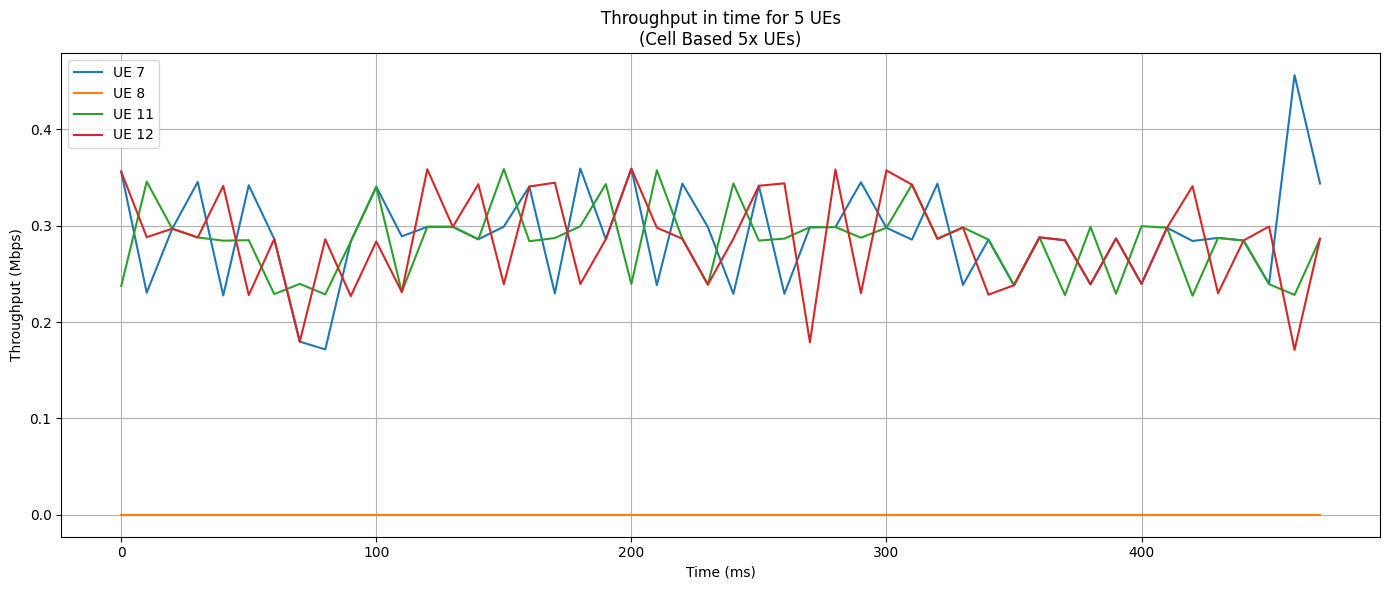

In [ ]:
# Graphic of Throughput and Rolling Average
plt.figure(figsize=(14, 6))
for ue, df in dfs_cb.items():
    sns.lineplot(x="Time (ms)", y="Throughput (Mbps)", data=df, label=f"UE {ue}")
plt.title("Throughput in time for 5 UEs\n(Cell Based 5x UEs)")
plt.xlabel("Time (ms)")
plt.ylabel("Throughput (Mbps)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

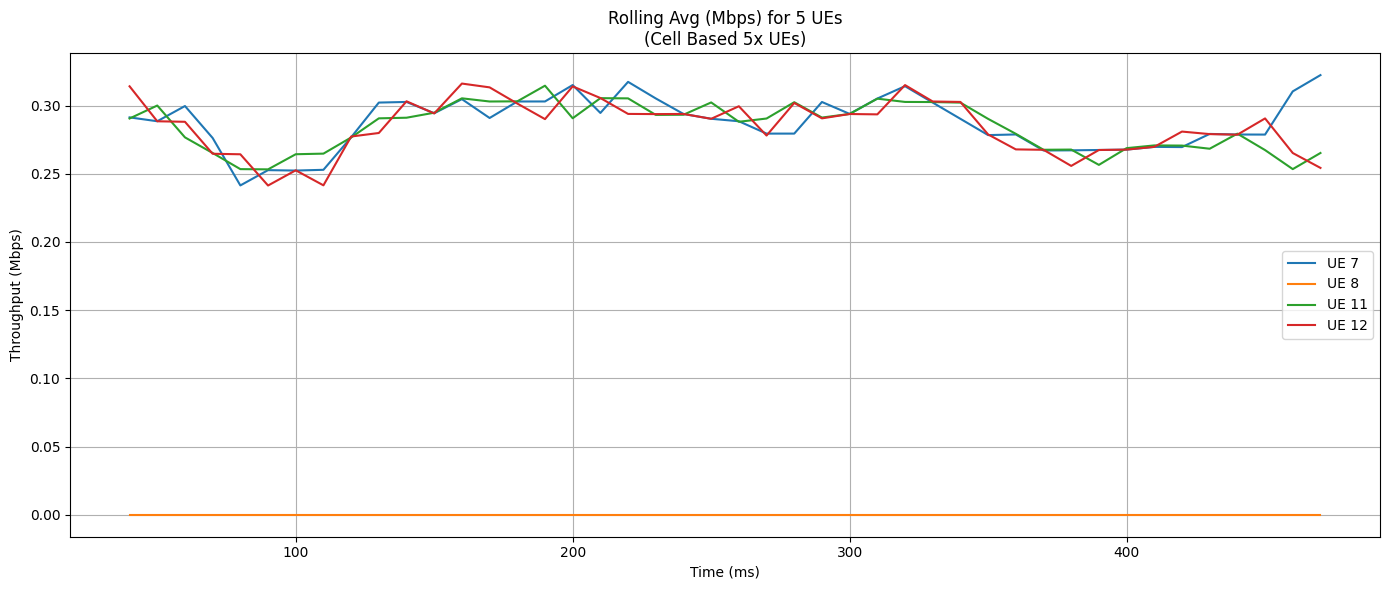

In [ ]:
# Graphic of Throughput and Rolling Average
plt.figure(figsize=(14, 6))
for ue, df in dfs_cb.items():
    sns.lineplot(x="Time (ms)", y="Rolling Avg (Mbps)", data=df, label=f"UE {ue}")
plt.title("Rolling Avg (Mbps) for 5 UEs\n(Cell Based 5x UEs)")
plt.xlabel("Time (ms)")
plt.ylabel("Throughput (Mbps)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Cell-Free 5x UE Throughput x Time

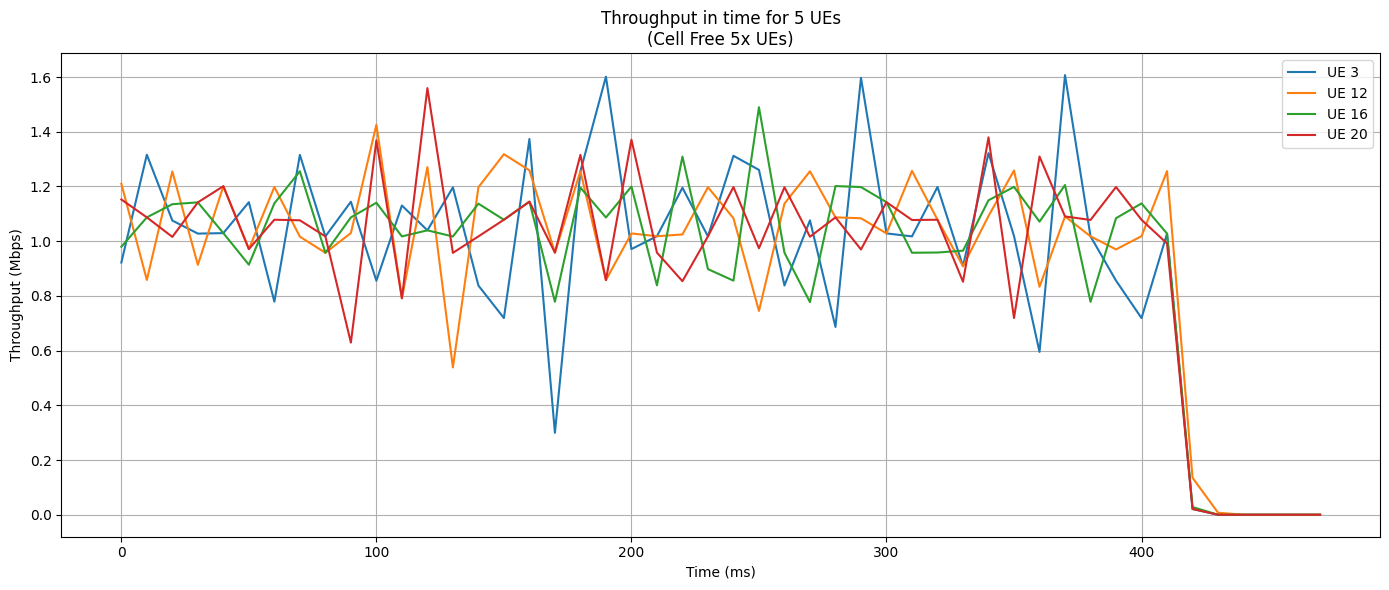

In [ ]:
# Graphic of Throughput and Rolling Average
plt.figure(figsize=(14, 6))
for ue, df in dfs_cf.items():
    sns.lineplot(x="Time (ms)", y="Throughput (Mbps)", data=df, label=f"UE {ue}")
plt.title("Throughput in time for 5 UEs\n(Cell Free 5x UEs)")
plt.xlabel("Time (ms)")
plt.ylabel("Throughput (Mbps)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

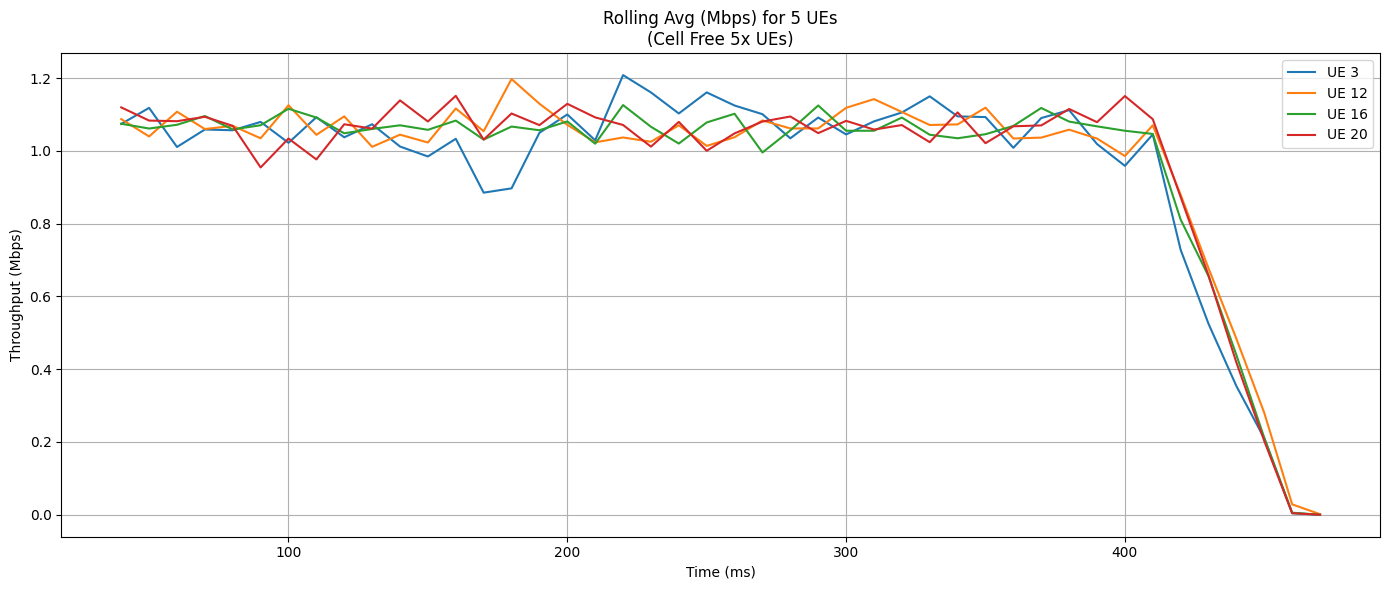

In [ ]:
# Graphic of Throughput and Rolling Average
plt.figure(figsize=(14, 6))
for ue, df in dfs_cf.items():
    sns.lineplot(x="Time (ms)", y="Rolling Avg (Mbps)", data=df, label=f"UE {ue}")
plt.title("Rolling Avg (Mbps) for 5 UEs\n(Cell Free 5x UEs)")
plt.xlabel("Time (ms)")
plt.ylabel("Throughput (Mbps)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Main statistics 5X Scenarios

### Cell-Based

In [ ]:
print(df_ind_cb["Throughput (Mbps)"].describe())

count    48.000000
mean      0.284672
std       0.050684
min       0.171120
25%       0.239185
50%       0.286490
75%       0.340762
max       0.359200
Name: Throughput (Mbps), dtype: float64


### Cell-Free

In [ ]:
print(df_cf_1x["Throughput (Mbps)"].describe())

NameError: name 'df_cf_1x' is not defined